# Brain Stroke Prediction

<img src="https://scitechdaily.com/images/3D-Brain-Illustration.gif">


A stroke is a medical condition in which poor blood flow to the brain causes cell death.

The risk factor for stroke is hypertension, any of the heart diseases, tobacco smoking and average glucose leve of person. 
2 main Symptoms of stroke is bleeding and ischemia. 
A Diagnosis is typically based on a physical exam and is supported by medical imaging such as a CT scan or MRI scan. A CT scan can rule out bleeding, but may not necessarily rule out ischemia, which early on typically does not show up on a CT scan. Other tests such as an electrocardiogram (ECG) and blood tests are done to determine risk factors and rule out other possible causes. Low blood sugar may cause similar symptoms.

With the followed analysis we are predicting the stroke persentage of person by considering these factord.
This will lead to preventing from stroke.

## The Attributess include:

- ID : Patient ID
- Gender : Sex of the patient [Male,Female]
- Age : Age of patient
- Hypertension : high blood pressure [1: Affected, 0:Not Affected]
- heart_disease : Any of the heart disease [1: Affected, 0:Not Affected]
- ever_married : Marital status [1: married, 2: not married]
- work_type : Sector for a job patient is working[children, Govt_job, Never_worked, Private,Self-employed]
- Residence_type : patient residing type [Urban,Rural]
- avg_glucose_level : glucose level in blood of patient calculated in md (Milligrams per decilitre) [Floating value between 55.12 to 271.74]
- bmi : Body mass index (a person's weight in kilograms (or pounds) divided by the square of height in meters) [Floating value between 10.3 to 97.6]
- smoking_status : patient smoking status [formerly smoked,formerly smoked,formerly smoked,Unknown]
- stroke : output value [1: stroke disease, 0: Normal]

## Importing required liberaries

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np

#### Importing data set

In [3]:
# Importing data set
BSPdata=pd.read_csv("Brain Stroke Prediction.csv")
BSPdata

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5107,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5108,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5109,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5110,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [4]:
# Dimensions of the dataframe
BSPdata.shape

(5112, 12)

#### Describing our data
It return various summary statistics.Returns the count, mean, standard deviation, minimum and maximum values and the quantiles of the data.

In [5]:
BSPdata.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5112.000000,5112.000000,5112.000000,5112.000000,5112.000000,4911.000000,5112.000000
mean,36521.022300,43.226917,0.097418,0.053991,106.139513,28.892140,0.048709
std,21158.196475,22.608227,0.296555,0.226021,45.276580,7.852655,0.215280
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17743.750000,25.000000,0.000000,0.000000,77.255000,23.500000,0.000000
50%,36944.000000,45.000000,0.000000,0.000000,91.865000,28.000000,0.000000
75%,54656.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


#### Analysing the information of data
It gives us the data type of all dependent and independent variable

In [6]:
BSPdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5112 entries, 0 to 5111
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5112 non-null   int64  
 1   gender             5112 non-null   object 
 2   age                5112 non-null   float64
 3   hypertension       5112 non-null   int64  
 4   heart_disease      5112 non-null   int64  
 5   ever_married       5112 non-null   object 
 6   work_type          5112 non-null   object 
 7   Residence_type     5112 non-null   object 
 8   avg_glucose_level  5112 non-null   float64
 9   bmi                4911 non-null   float64
 10  smoking_status     5112 non-null   object 
 11  stroke             5112 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.4+ KB


#### Inspecting the Dataframe

In [7]:
# Top 10 rows  
BSPdata.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [8]:
# Bottom 10 rows  
BSPdata.tail(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5102,45010,Female,57.0,0,0,Yes,Private,Rural,77.93,21.7,never smoked,0
5103,22127,Female,18.0,0,0,No,Private,Urban,82.85,46.9,Unknown,0
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5105,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0
5106,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5107,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5108,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5109,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5110,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0
5111,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


## Data Visualization

In [9]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
BSPdata.head(1)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1


#### Visualizing  numeric variable of data set(using pair plot)

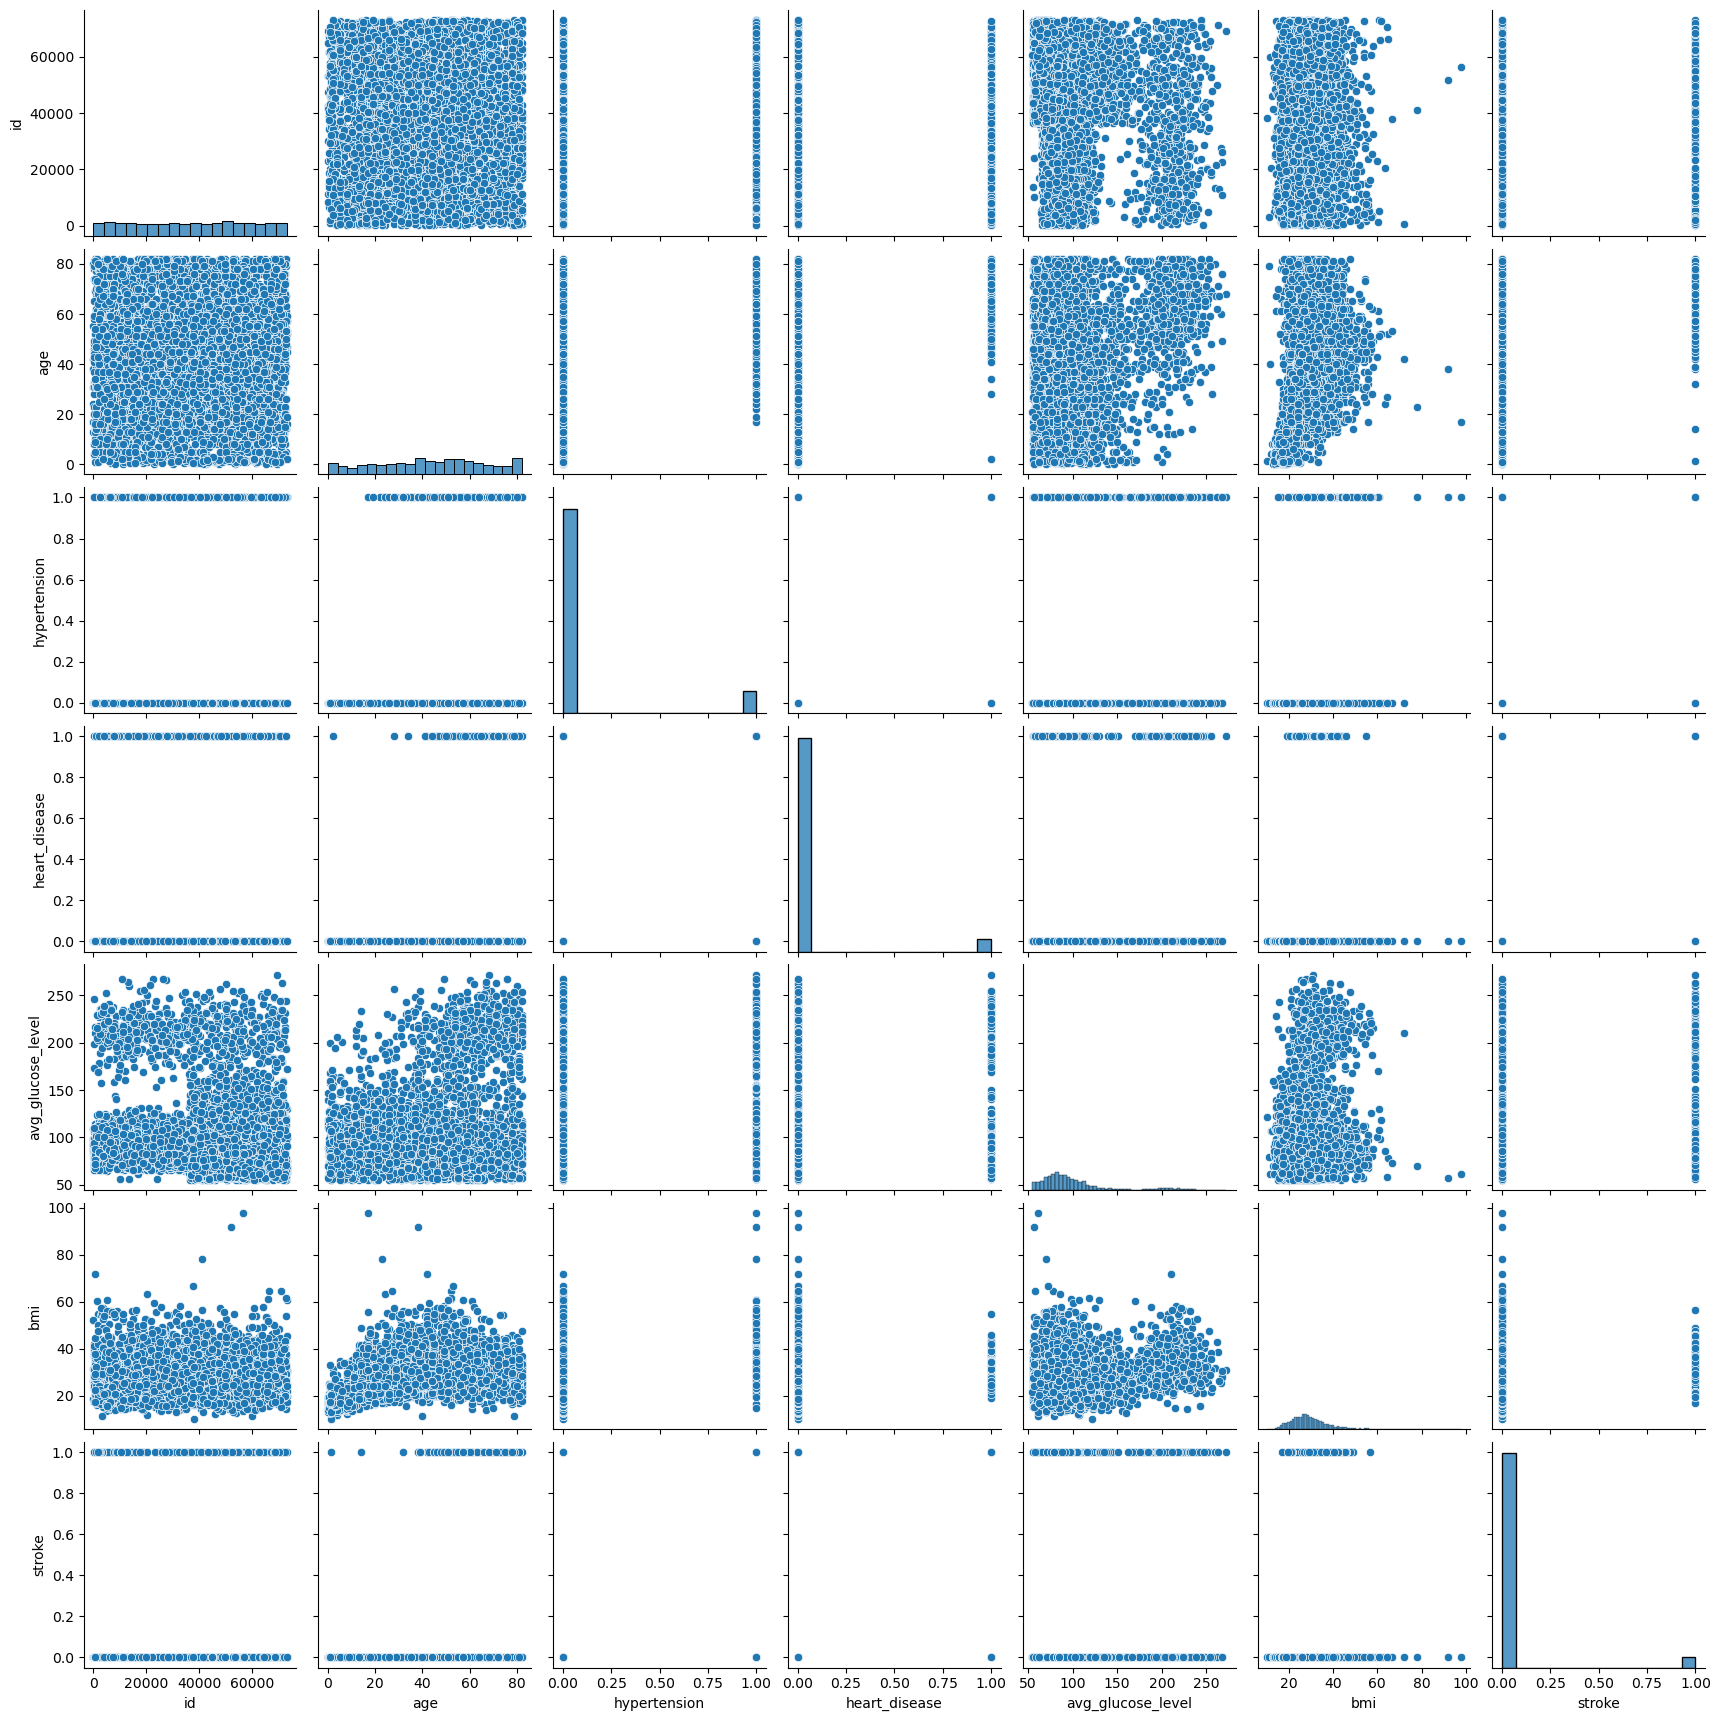

In [11]:
sns.pairplot(BSPdata)
plt.savefig("pairplot.png")
plt.show()

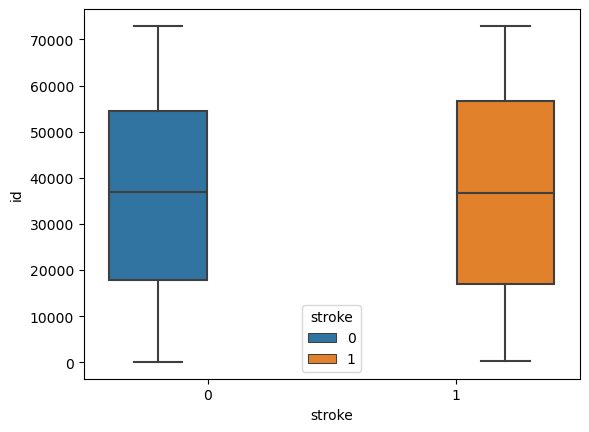

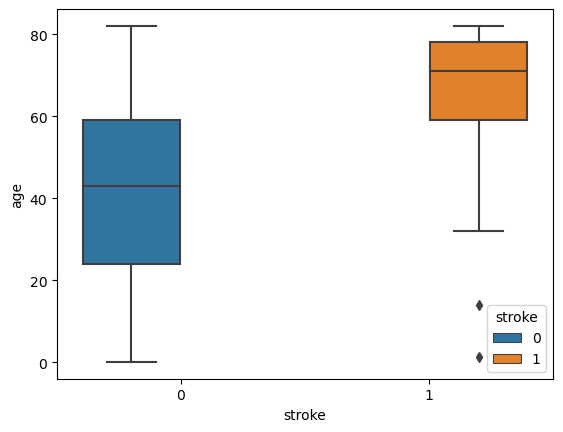

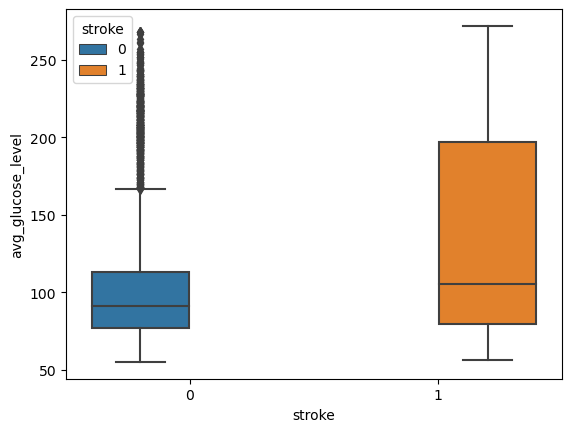

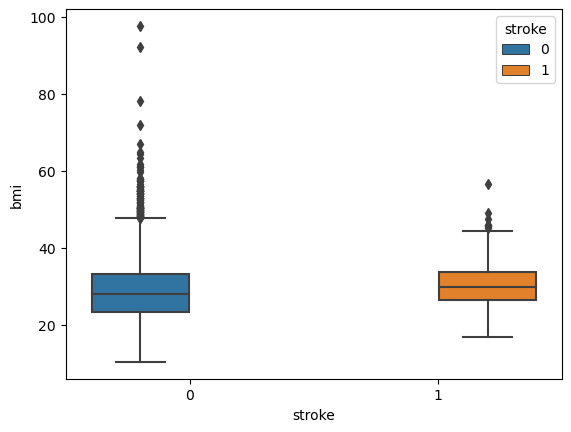

In [16]:
# Shows the Distribution of Heat Diseases with respect to other variables

continuous = ['id', 'age', 'avg_glucose_level', 'bmi']

for i in continuous:
    sns.boxplot(x=BSPdata['stroke'],y=BSPdata[i],hue = BSPdata['stroke'])
    plt.savefig('plot'+str(i)+'.png')
    plt.show()
    

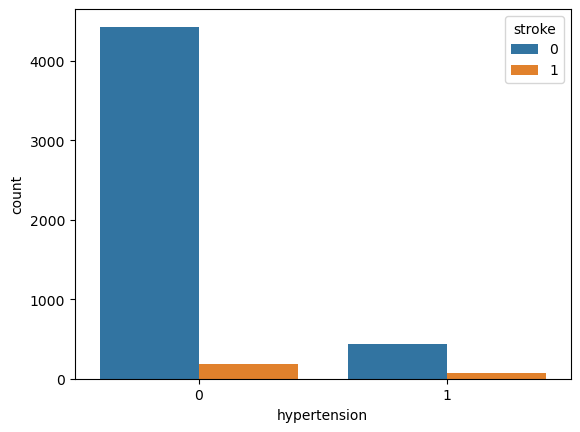

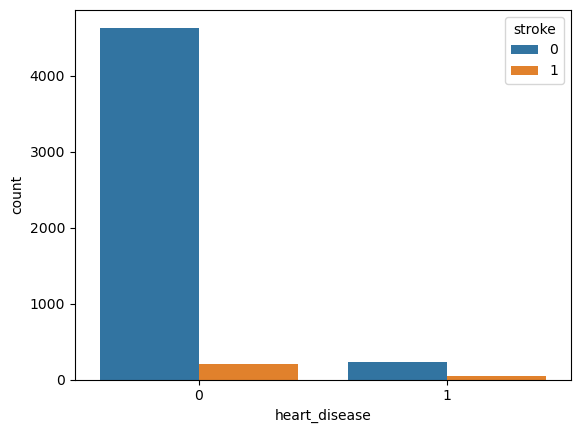

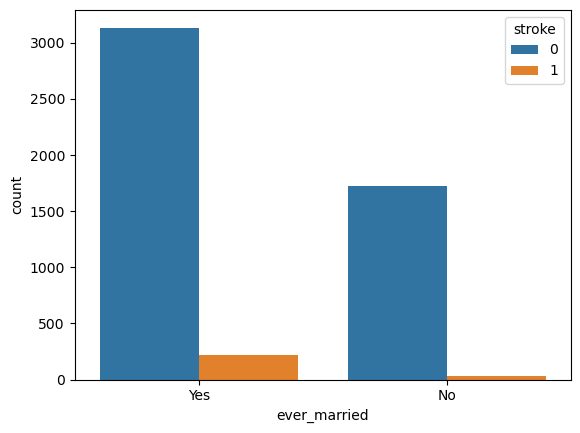

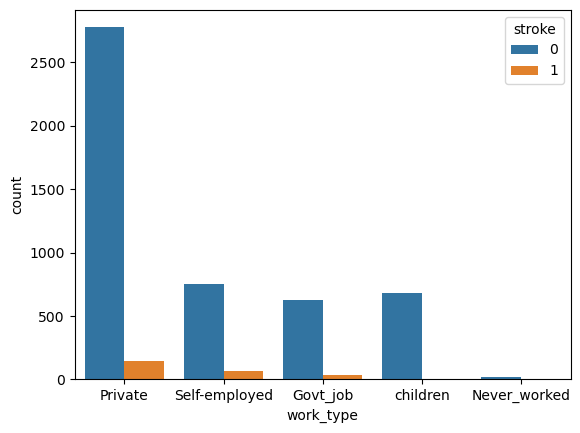

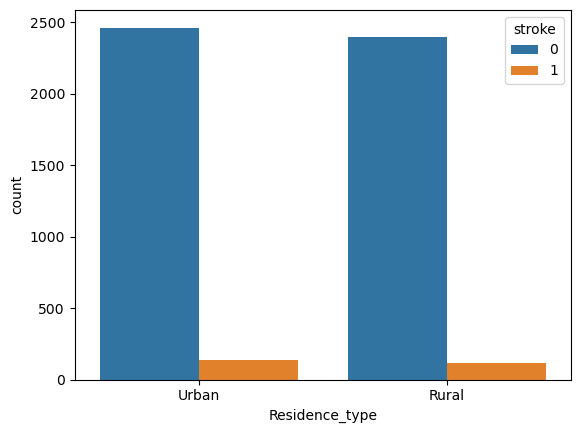

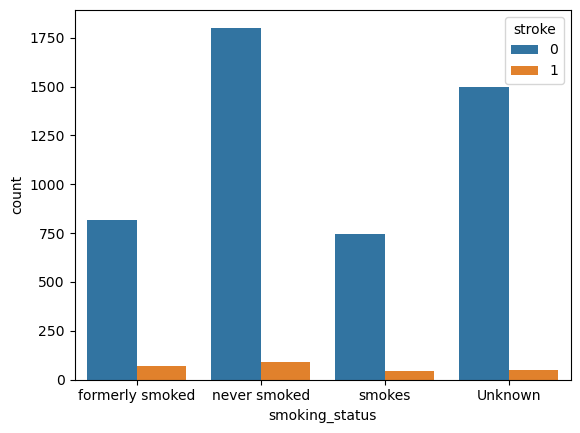

In [14]:
# Shows the Distribution of Heat Diseases with respect to other variables

categorical = ['hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

for i in categorical:
    sns.countplot(x=BSPdata[i],data=BSPdata, hue=BSPdata['stroke'])
    plt.savefig('plot'+str(i)+'.png')
    plt.show()

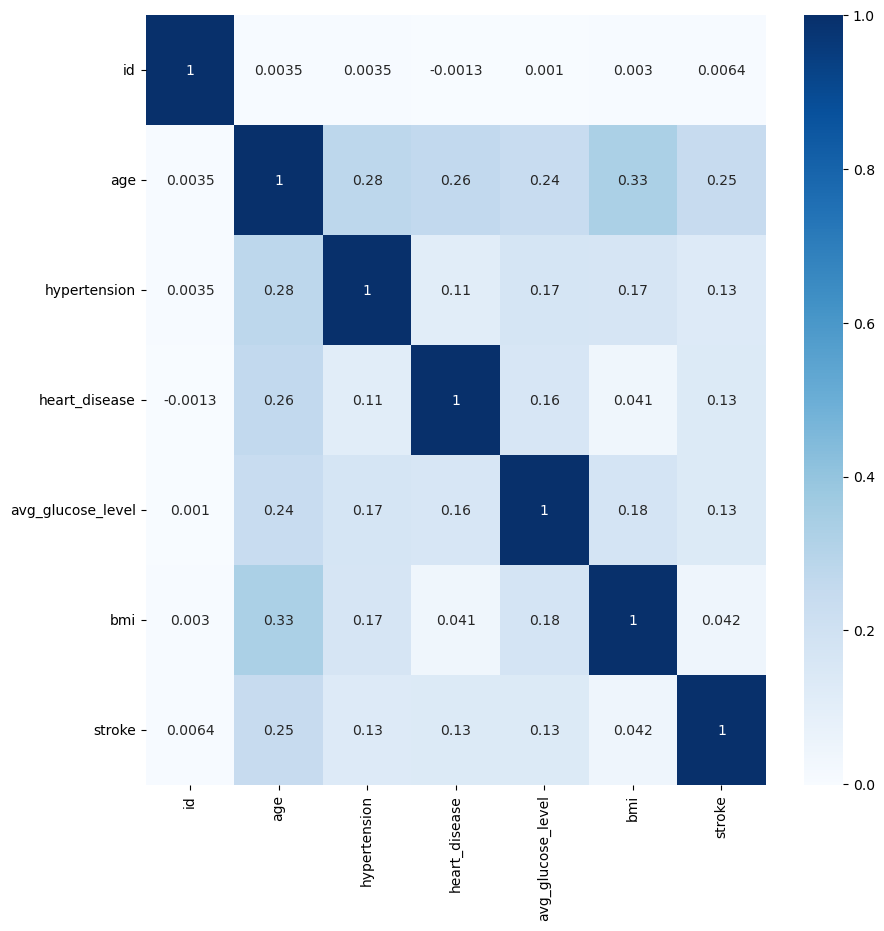

In [17]:
# Let's see the correlation matrix 
plt.figure(figsize = (10,10))       
# Size of the figure
sns.heatmap(BSPdata.corr(),annot = True,cmap='Blues')
plt.savefig("heatmap.png")
plt.show()

By this corelation we can analyse age is highly corelated to the stroke

## Data Preprocessing
Data preprocessing is an integral step in Machine Learning as the quality of data and the useful information that can be derived from it directly affects the ability of our model to learn; therefore, it is extremely important that we preprocess our data before feeding it into our model.

The concepts that I will cover in this article are
1. Handling Null Values
2. Feature Scaling
3. Handling Categorical Variables

### Handling Null Values : 


In [18]:
BSPdata.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

As we obsered there are  null values available in bmi variable

**This null value occured in contineous variable, which can be treated with mean else median**

In [19]:
BSPdata['bmi'].isna().sum()

201

In [20]:
BSPdata['bmi'].fillna(BSPdata['bmi'].mean(),inplace=True)

In [21]:
BSPdata.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

### Handling categorical variable: 

In [22]:
BSPdata.head(1)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1


In [23]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy = pd.get_dummies(BSPdata[['age','hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']], drop_first=True)
# Adding the results to the master dataframe
BSPdata = pd.concat([BSPdata, dummy], axis=1)

In [28]:
BSPdata.head()
plt.savefig("head.png")

<Figure size 640x480 with 0 Axes>

In [25]:
# To display maximum rows and columns 

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [26]:
BSPdata.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age,hypertension,heart_disease,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.60000,formerly smoked,1,67.0,0,1,1,0,1,0,0,1,1,0,0
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.89214,never smoked,1,61.0,0,0,1,0,0,1,0,0,0,1,0
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.50000,never smoked,1,80.0,0,1,1,0,1,0,0,0,0,1,0
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.40000,smokes,1,49.0,0,0,1,0,1,0,0,1,0,0,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.00000,never smoked,1,79.0,1,0,1,0,0,1,0,0,0,1,0


#### Dropping the repeated variables

In [29]:
# We have created dummies for the below variables, so we can drop them
BSPdata = BSPdata.drop(['gender','hypertension','heart_disease','ever_married','work_type', 'Residence_type','smoking_status'], 1)

In [30]:
BSPdata.head()

,id,age,avg_glucose_level,bmi,stroke,age,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,228.69,36.60000,1,67.0,1,0,1,0,0,1,1,0,0
1,51676,61.0,202.21,28.89214,1,61.0,1,0,0,1,0,0,0,1,0
2,31112,80.0,105.92,32.50000,1,80.0,1,0,1,0,0,0,0,1,0
3,60182,49.0,171.23,34.40000,1,49.0,1,0,1,0,0,1,0,0,1
4,1665,79.0,174.12,24.00000,1,79.0,1,0,0,1,0,0,0,1,0


## Test-Train Split

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
# Putting feature variable to X
X = BSPdata.drop(['stroke'], axis=1)

X.head()

,id,age,avg_glucose_level,bmi,age,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,228.69,36.60000,67.0,1,0,1,0,0,1,1,0,0
1,51676,61.0,202.21,28.89214,61.0,1,0,0,1,0,0,0,1,0
2,31112,80.0,105.92,32.50000,80.0,1,0,1,0,0,0,0,1,0
3,60182,49.0,171.23,34.40000,49.0,1,0,1,0,0,1,0,0,1
4,1665,79.0,174.12,24.00000,79.0,1,0,0,1,0,0,0,1,0


In [33]:
# Putting response variable to y
y = BSPdata['stroke']

y.head()

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

In [34]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [35]:
# To check the shape
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(3578, 14) (1534, 14) (3578,) (1534,)


In [36]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
scaler = MinMaxScaler()

X_train[['id', 'age', 'avg_glucose_level', 'bmi']] = scaler.fit_transform(X_train[['id', 'age', 'avg_glucose_level', 'bmi']])

X_train.head()

,id,age,avg_glucose_level,bmi,age,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
290,0.763072,0.157715,0.275690,0.091638,0.157715,0,0,0,0,1,1,0,0,0
0,0.122926,0.816895,0.801265,0.301260,0.816895,1,0,1,0,0,1,1,0,0
4166,0.707765,0.560547,0.273936,0.164948,0.560547,1,0,1,0,0,0,1,0,0
2201,0.760134,0.841309,0.651879,0.171821,0.841309,1,0,1,0,0,1,0,1,0
1614,0.648725,0.000000,0.390315,0.043528,0.000000,0,0,0,0,1,1,0,0,0


In [38]:
X_test.head()

,id,age,avg_glucose_level,bmi,age,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
2918,50508,63.0,239.95,32.2,63.0,1,0,0,1,0,0,0,0,1
3056,10744,62.0,73.70,26.2,62.0,1,0,0,0,0,0,0,1,0
4917,27804,23.0,110.23,39.1,23.0,0,0,1,0,0,0,0,0,0
4003,46141,24.0,147.74,21.4,24.0,0,0,1,0,0,0,0,0,0
3332,42481,27.0,114.32,28.1,27.0,1,0,1,0,0,1,0,0,0


In [39]:
#scaler = MinMaxScaler()

X_test[['id', 'age', 'avg_glucose_level', 'bmi']] = scaler.fit_transform(X_test[['id', 'age', 'avg_glucose_level', 'bmi']])

X_test.head()

,id,age,avg_glucose_level,bmi,age,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
2918,0.692414,0.767840,0.869768,0.375969,0.767840,1,0,0,1,0,0,0,0,1
3056,0.146565,0.755621,0.087010,0.259690,0.755621,1,0,0,0,0,0,0,1,0
4917,0.380752,0.279081,0.259005,0.509690,0.279081,0,0,1,0,0,0,0,0,0
4003,0.632468,0.291300,0.435614,0.166667,0.291300,0,0,1,0,0,0,0,0,0
3332,0.582226,0.327957,0.278262,0.296512,0.327957,1,0,1,0,0,1,0,0,0


## Model Building

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
lr = LogisticRegression()

In [42]:
# Training data is used for model building
lr.fit(X_train, y_train)

LogisticRegression()

In [43]:
# Testing data is used for prediction
y_pred_logreg = lr.predict(X_test)

In [44]:
from sklearn.metrics import accuracy_score

In [45]:
accuracy_score(y_test, y_pred_logreg)

0.9550195567144719

In [46]:
# Libraries for Validation of models
from sklearn.metrics import confusion_matrix

In [47]:
logistic_confusion_matrix = confusion_matrix(y_test, y_pred_logreg)
logistic_confusion_matrix


array([[1465,    0],
       [  69,    0]], dtype=int64)

In [54]:
#disp=logistic_confusion_matrix()

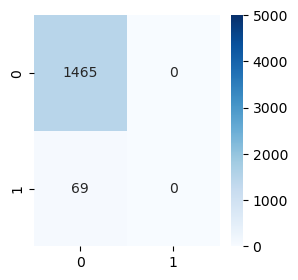

In [55]:
plt.figure(figsize = (3,3))      
sns.heatmap(logistic_confusion_matrix,annot=True,cmap='Blues',vmax=5000,vmin=0,fmt=".0f")
plt.savefig("logistic_confusion_matrix.png")
plt.show()

In [51]:
from sklearn.metrics import roc_curve, roc_auc_score

In [52]:
# Function For Logistic Regression Create Summary For Logistic Regression

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', lw=2,linestyle='--')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle=':')
    plt.xlabel('False Positive Rate(1-specificity)')
    plt.ylabel('True Positive Rate (sensitivity)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

def get_summary(y_test, y_pred_logreg):
    # Confusion Matrix
    conf_mat = confusion_matrix(y_test, y_pred_logreg)
    TP = conf_mat[0,0:1]
    FP = conf_mat[0,1:2]
    FN = conf_mat[1,0:1]
    TN = conf_mat[1,1:2]
    
    accuracy = (TP+TN)/((FN+FP)+(TP+TN))
    sensitivity = TP/(TP+FN)
    specificity = TN/(TN+FP)
    precision = TP/(TP+FP)
    recall =  TP / (TP + FN)
    fScore = (2 * recall * precision) / (recall + precision)
    auc = roc_auc_score(y_test, y_pred_logreg)

    print("Confusion Matrix:\n",conf_mat)
    print("Accuracy:",accuracy)
    print("Sensitivity :",sensitivity)
    print("Specificity :",specificity)
    print("Precision:",precision)
    print("Recall:",recall)
    print("F-score:",fScore)
    print("AUC:",auc)
    print("ROC curve:")
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_logreg)
    plot_roc_curve(fpr, tpr)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Confusion Matrix:
 [[1465    0]
 [  69    0]]
Accuracy: [0.95501956]
Sensitivity : [0.95501956]
Specificity : [nan]
Precision: [1.]
Recall: [0.95501956]
F-score: [0.97699233]
AUC: 0.5
ROC curve:


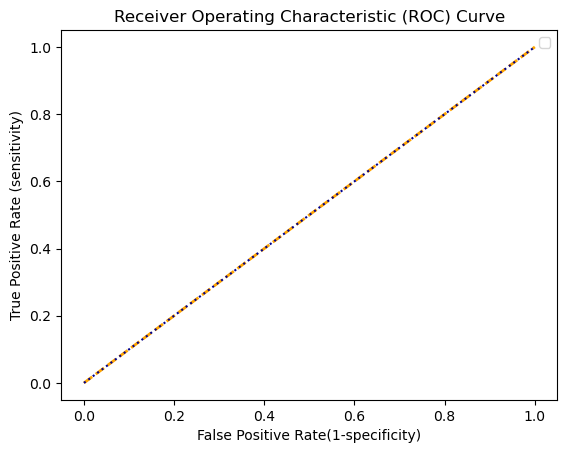

In [59]:
get_summary(y_test, y_pred_logreg)

# Support Vector Machine (SVM)

In [60]:
X_train.head()

,id,age,avg_glucose_level,bmi,age,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
290,0.763072,0.157715,0.275690,0.091638,0.157715,0,0,0,0,1,1,0,0,0
0,0.122926,0.816895,0.801265,0.301260,0.816895,1,0,1,0,0,1,1,0,0
4166,0.707765,0.560547,0.273936,0.164948,0.560547,1,0,1,0,0,0,1,0,0
2201,0.760134,0.841309,0.651879,0.171821,0.841309,1,0,1,0,0,1,0,1,0
1614,0.648725,0.000000,0.390315,0.043528,0.000000,0,0,0,0,1,1,0,0,0


In [61]:
y_train.head()

290     0
0       1
4166    0
2201    0
1614    0
Name: stroke, dtype: int64

In [62]:
from sklearn.svm import SVC

In [63]:
svc = SVC()

In [64]:
svc.fit(X_train, y_train)

SVC()

In [65]:
y_pred_svc = svc.predict(X_test)

In [66]:
accuracy_score(y_test, y_pred_svc)

0.9550195567144719

In [67]:
SVM_confusion_matrix = confusion_matrix(y_test, y_pred_svc)
SVM_confusion_matrix

array([[1465,    0],
       [  69,    0]], dtype=int64)

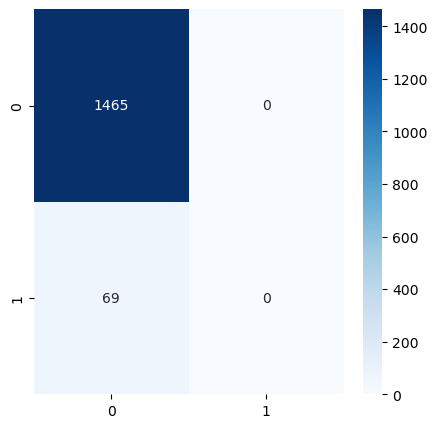

In [69]:
plt.figure(figsize = (5,5))      
sns.heatmap(SVM_confusion_matrix,annot=True,cmap='Blues',fmt=".0f")
plt.savefig("SVM_confusion_matrix.png")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Confusion Matrix:
 [[1465    0]
 [  69    0]]
Accuracy: [0.95501956]
Sensitivity : [0.95501956]
Specificity : [nan]
Precision: [1.]
Recall: [0.95501956]
F-score: [0.97699233]
AUC: 0.5
ROC curve:


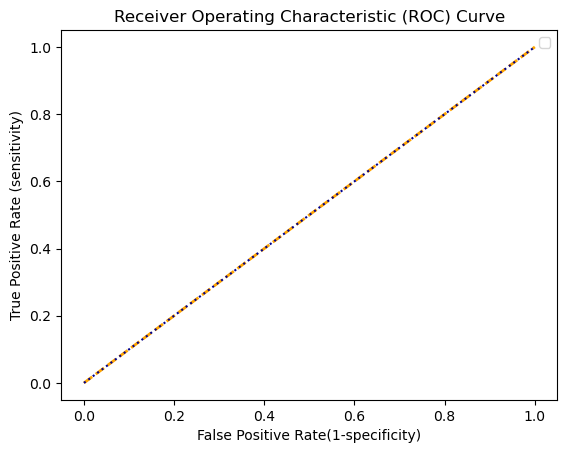

In [70]:
get_summary(y_test, y_pred_svc)

# Naive bayes Classification

In [71]:
from sklearn.naive_bayes import GaussianNB

In [72]:
gnb = GaussianNB()

In [73]:
gnb.fit(X_train, y_train)

GaussianNB()

In [74]:
y_pred_gnb = gnb.predict(X_test)

In [75]:
accuracy_score(y_test,y_pred_gnb)

0.4152542372881356

In [76]:
gnb_confusion_matrix = confusion_matrix(y_test, y_pred_gnb)
gnb_confusion_matrix

array([[569, 896],
       [  1,  68]], dtype=int64)

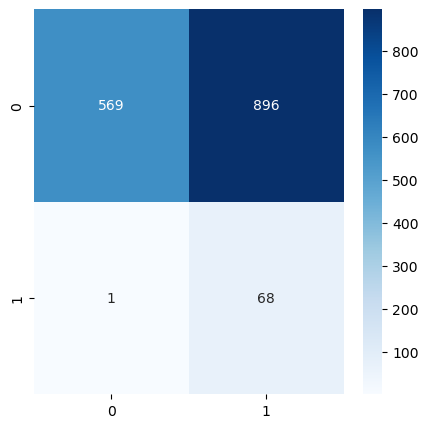

In [79]:
plt.figure(figsize = (5,5))      
sns.heatmap(gnb_confusion_matrix ,annot=True,cmap='Blues',fmt=".0f")
plt.savefig("gnb_confusion_matrix.png")
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Confusion Matrix:
 [[569 896]
 [  1  68]]
Accuracy: [0.41525424]
Sensitivity : [0.99824561]
Specificity : [0.07053942]
Precision: [0.3883959]
Recall: [0.99824561]
F-score: [0.55921376]
AUC: 0.6869515754068358
ROC curve:


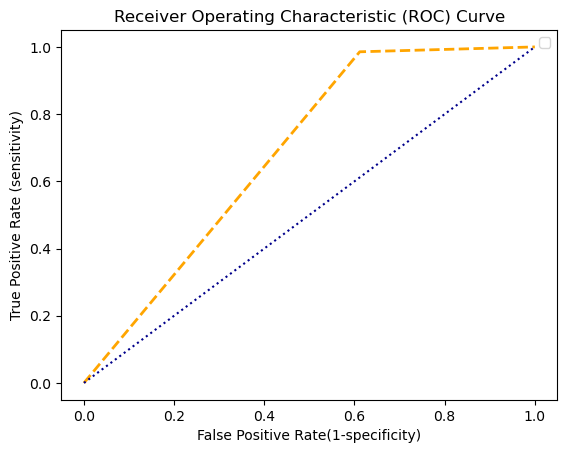

In [80]:
get_summary(y_test, y_pred_gnb)

# K - Nearest Neighbour

In [81]:
from sklearn.neighbors import KNeighborsClassifier

In [82]:
knn = KNeighborsClassifier()

In [83]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [84]:
y_pred_knn = knn.predict(X_test)

In [85]:
accuracy_score(y_test, y_pred_knn)

0.9504563233376793

In [86]:
knn_confusion_matrix = confusion_matrix(y_test, y_pred_knn)
knn_confusion_matrix

array([[1457,    8],
       [  68,    1]], dtype=int64)

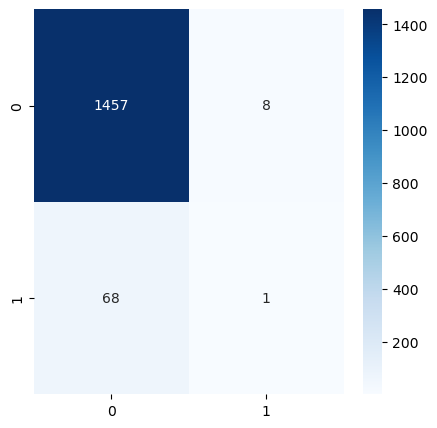

In [88]:
plt.figure(figsize = (5,5))      
sns.heatmap(knn_confusion_matrix ,annot=True,cmap='Blues',fmt=".0f")
plt.savefig("knn_confusion_matrix.png")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Confusion Matrix:
 [[1457    8]
 [  68    1]]
Accuracy: [0.95045632]
Sensitivity : [0.95540984]
Specificity : [0.11111111]
Precision: [0.99453925]
Recall: [0.95540984]
F-score: [0.97458194]
AUC: 0.5045160013849731
ROC curve:


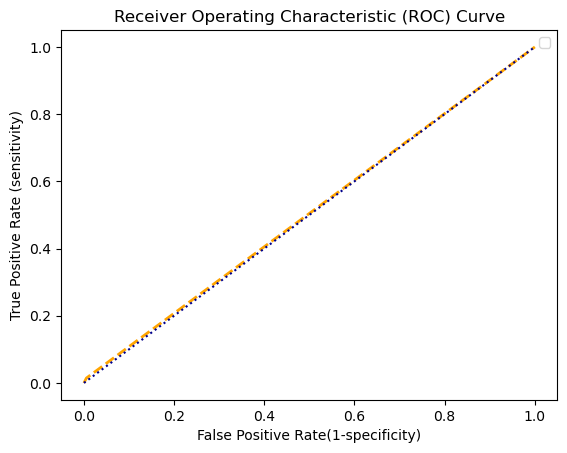

In [89]:
get_summary(y_test, y_pred_knn)

# Decision Tree

In [90]:
from sklearn.tree import DecisionTreeClassifier

In [91]:
dtree = DecisionTreeClassifier()

In [92]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [94]:
y_pred_dtree = dtree.predict(X_test)

In [95]:
accuracy_score(y_test, y_pred_dtree)

0.9009126466753585

In [96]:
dtree_confusion_matrix = confusion_matrix(y_test, y_pred_dtree)
dtree_confusion_matrix

array([[1373,   92],
       [  60,    9]], dtype=int64)

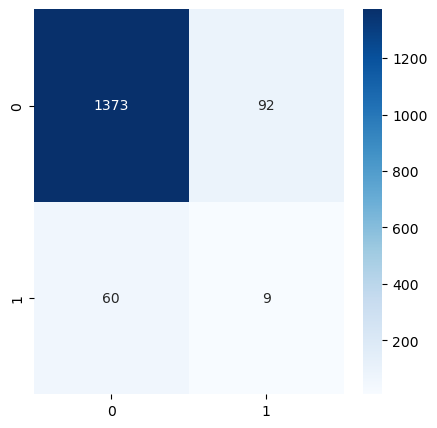

In [98]:
plt.figure(figsize = (5,5))      
sns.heatmap(dtree_confusion_matrix ,annot=True,cmap='Blues',fmt=".0f")
plt.savefig("dtree_confusion_matrix.png")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Confusion Matrix:
 [[1373   92]
 [  60    9]]
Accuracy: [0.90091265]
Sensitivity : [0.9581298]
Specificity : [0.08910891]
Precision: [0.93720137]
Recall: [0.9581298]
F-score: [0.94755003]
AUC: 0.5338180738982045
ROC curve:


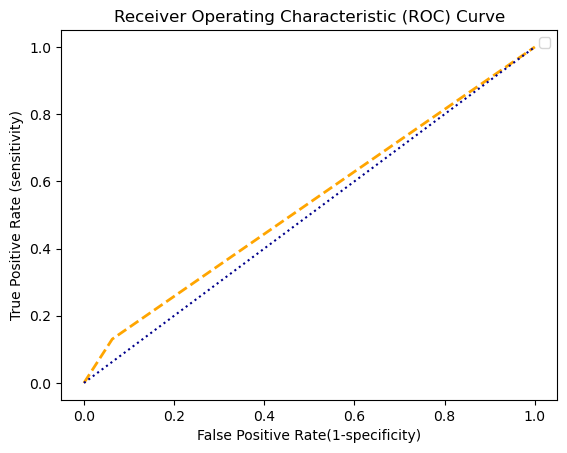

In [112]:
get_summary(y_test, y_pred_dtree)

# Random Forest

In [100]:
from sklearn.ensemble import RandomForestClassifier

In [101]:
rfc = RandomForestClassifier()

In [102]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [103]:
y_pred_rfc = rfc.predict(X_test)

In [104]:
accuracy_score(y_test, y_pred_rfc)

0.9530638852672751

In [105]:
RandomForest_confusion_matrix = confusion_matrix(y_test, y_pred_rfc)
RandomForest_confusion_matrix

array([[1461,    4],
       [  68,    1]], dtype=int64)

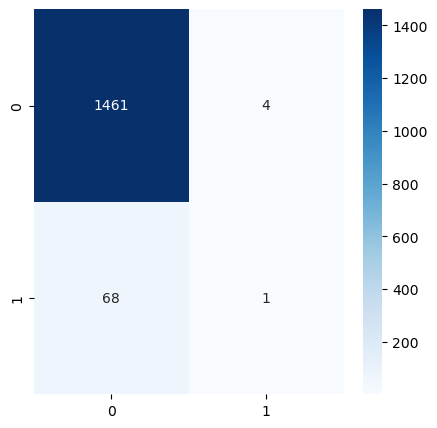

In [107]:
plt.figure(figsize = (5,5))      
sns.heatmap(RandomForest_confusion_matrix ,annot=True,cmap='Blues',fmt=".0f")
plt.savefig("RandomForest_confusion_matrix.png")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Confusion Matrix:
 [[1461    4]
 [  68    1]]
Accuracy: [0.95306389]
Sensitivity : [0.95552649]
Specificity : [0.2]
Precision: [0.99726962]
Recall: [0.95552649]
F-score: [0.9759519]
AUC: 0.5058811890982837
ROC curve:


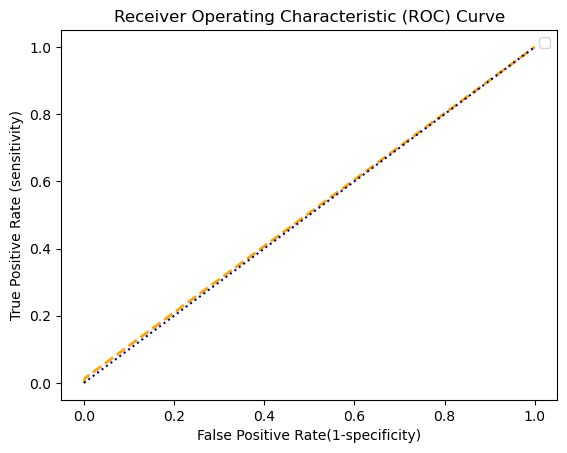

In [113]:
get_summary(y_test, y_pred_rfc)